# Decision Tree
Data : white_wine.csv
How :
- Apply decision tree clasification method (max_depth = 2)
    - target : quality (quality > 6 -> Y = 1)
    - features : density alcohol
- Validate model using accuracy in 20% testing data
- Apply scaling and validate the model using accuracy in 20% testing data
- Check the performance: is there any difference whether we applied scaling or not?
- Check the tree: is there any difference whether we applied scaling or not?


## Import Library & Data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\user\Documents\Data Science\What is Classification_\white_wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


## Feature Engineeing

In [4]:
df['label'] = np.where(df['quality'] > 6, 1, 0) # change value to 1 for quality > 6 and 0 for quality <= 6
df[['quality', 'label']]

,quality,label
0,6.0,0
1,6.0,0
2,6.0,0
3,6.0,0
4,6.0,0
...,...,...
515,6.0,0
516,5.0,0
517,6.0,0
518,6.0,0


In [15]:
df['alcohol'].fillna(df['alcohol'].mean(), inplace=True) # missing value handling with impute mean value
df[['alcohol', 'density']].isnull().sum() # missing value check

alcohol    0
density    0
dtype: int64


## Data Spliting

In [5]:
from sklearn.model_selection import train_test_split

In [17]:
x = df[['alcohol', 'density']] # feature
y = df['label'] # target

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2020) # data splitting

## Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler() # define scaler
scaler.fit(x_train) # fitting scaler
x_train_scaled = scaler.transform(x_train) # X train scaled
x_test_scaled = scaler.transform(x_test) # X test scaled

______
## Model without Scaling

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
tree = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy') # model definition

In [21]:
tree.fit(x_train, y_train) # model fitting

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [22]:
y_pred_class = tree.predict(x_test) # y prediction

In [23]:
from sklearn.metrics import accuracy_score # metrics evaluation

In [25]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_pred_class)*100, '%')

Model accuracy in test dataset: 92.3076923076923 %


In [26]:
from sklearn.tree import plot_tree

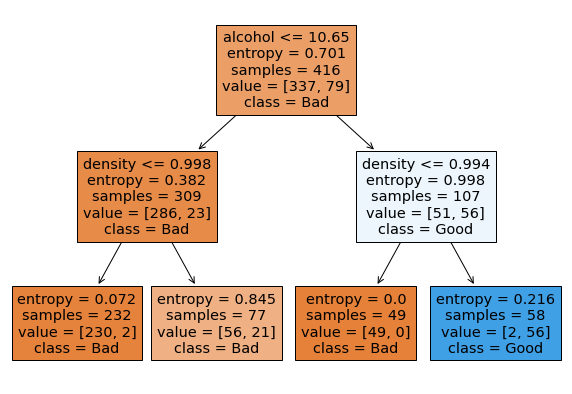

In [31]:
plt.figure(figsize=(10, 7))
plot_tree(tree, feature_names = list(x), class_names = ['Bad','Good'], filled = True) # decision tree plotting
plt.show()

> 1. Alcohol <= 10.65, density <= 0.998 -> Bad
> 2. Alcohol <= 10.65, density > 0.998 -> Bad
> 3. Alcohol > 10.65, density <= 0.994 -> Bad
> 4. Alcohol > 10.65, density > 0.994 -> Good
      
If alcohol = 11, density = 1 -> good
If alcohol = 10, density = 0.9 -> bad

_______
## Model with Scaling

In [34]:
tree_scaled = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy') # model definition for scaled variable

In [35]:
tree_scaled.fit(x_train_scaled, y_train) # fitting model

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [36]:
y_pred_test_scaled =  tree_scaled.predict(x_test_scaled) # y prediciton for scaled variable

In [37]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_pred_test_scaled)*100, '%')

Model accuracy in test dataset: 92.3076923076923 %


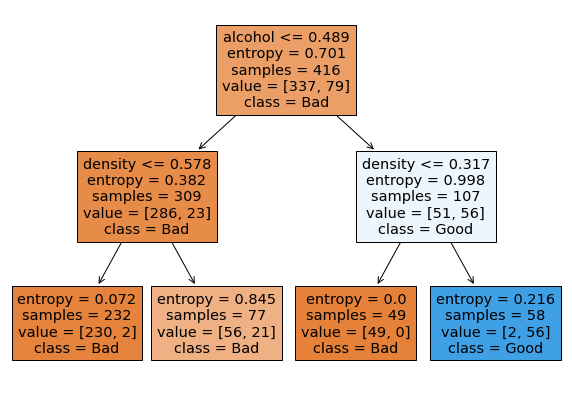

In [38]:
plt.figure(figsize=(10, 7))
plot_tree(tree_scaled, feature_names = list(x), class_names = ['Bad','Good'], filled = True) # decision tree plotting for scaled variable
plt.show()

## Conclusion

There is **no difference** in performance whether we applied scaling or not. Instead scaling make the tree **harder to understand because the unit of variables change**. The unit of alchohol is no longer in % and the unit in density is no longer in Kg/m^2. 

As comparison, it is easier to explain the rule in the first tree. In the first tree we can say that if there is a wine with the alcohol below 10.85 % and the density below 1.001 kg/m^2 the wine will be predicted as good quality wine. While in the second tree what we are able to say directly is if there is a wine with the standardize version of alcohol variable below 0.534 and the standardize version of density below 0.842 the wine will be predicted as good quality wine. The second one is much harder to understand.